## Investigate Narrative Context Construction and Forgetting

### Implements ABCD-ABDC Task

There are two sets of reservoirs: one that gets a shifted version of the story, and one that gets the original story.

Each set has Echo State Networks whose connection matrices are imposed connectomes from the Conn2Res toolbox. The following connectomes have been implemented:
 - Dorsal Attention (DA)
 - Default Mode Network (DMN)
 - Frontoparietal (FP)
 - Limbic (LIM)
 - Somatomotor (SM)
 - Ventral Attention (VA)
 - Visual (VIS)

The purpose of this exploration is to ascertain the effect of biologically-informed connectome on reservoir computer processing of narrative. In other words, does connectome matter for narrative context construction and forgetting, or does a randomly-connected reservoir suffice?

In [6]:
# First construct Conn2Res Reservoirs

from resUtils import *
from narrativeUtils import *

# get and encode both stories
wiki2vec_model = "/home/ijackson/dynamics/sandbox/enwiki_20180420_100d.pkl"
notthefallwords = readTxtAsList("data/not-the-fall.txt")
notthefallshifted = readTxtAsList("data/not-the-fall-shift-2.txt")

notthefallwords_preproc = preprocessTextForEmbedding(notthefallwords)
notthefallshifted_preproc = preprocessTextForEmbedding(notthefallshifted)

wiki2vec_model = getWiki2VecModel()
NTF = getWiki2VecEmbeddings(notthefallwords_preproc, wiki2vec_model)
NTFShifted = getWiki2VecEmbeddings(notthefallshifted_preproc, wiki2vec_model)

Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 6998.00it/s]


Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...
Splitting words in the same string...
Removing stop words from word list...


100%|██████████| 179/179 [00:00<00:00, 6582.44it/s]

Removing 's, ', -, 'd, 'll, 've, 're from word list...
Splitting words in the same string...
Removing ', " and ’ from word list...



/home/ijackson/dynamics/dynamics/lib/python3.10/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12560804 -0.5235532  -0.13231167 ... -0.48633438  0.45111445
   0.11309847]
 [-0.12473089 -0.6455471   0.13622157 ... -0.6347396   0.5410465
   0.32159257]
 [-0.05129661 -0.4987064  -0.09563554 ... -0.30148467  0.24280211
  -0.08308805]
 ...
 [-1.0583687  -0.83086014 -0.4427682  ... -1.0160557  -0.02469787
   0.99688977]
 [-1.0772408  -0.32139003 -0.79673034 ... -1.3150353  -0.12155519
   0.57841384]
 [-0.86319923 -0.5425662  -0.5506818  ... -1.1069874   0.26995388
   0.43403685]] loaded from the file /home/ijackson/dynamics/sandbox/enwiki_20180420_100d.pkl is not byte aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/home/ijack

In [7]:
NTF

array([[-0.38508263,  0.4990246 ,  0.56150955, ...,  0.25889742,
        -0.06870355,  0.13184538],
       [ 0.08985843,  0.56709975,  0.84662026, ...,  0.42307466,
        -0.61829203,  0.48212472],
       [ 0.70248985,  0.21994741,  0.7220434 , ...,  0.58986104,
        -0.55301082,  0.42409414],
       ...,
       [ 0.00457859,  0.46887141,  0.2654835 , ...,  0.20739746,
        -0.29432815, -0.35251495],
       [ 0.26846921,  0.4169789 ,  0.34754774, ...,  0.34424493,
        -0.07967646,  0.18925419],
       [ 0.47986183,  0.4367317 , -0.25710919, ...,  0.28504178,
        -0.25015774,  0.22540852]])

In [15]:
# get the reservoirs
# Win_random_weight=False

# feed them the stories and get the states
# do this for a range of seeds
# res_seeds = range(0,200)
# get 100 random numbers
res_seeds = np.random.randint(0, 1000000, 100)
res_seeds = [int(seed) for seed in res_seeds]
import pickle
from tqdm import tqdm

for seed in tqdm(res_seeds):
    reservoirs = createConn2ResReservoirs(seed=seed)
    states1 = simulateReservoirs(reservoirs, NTF)
    states2 = simulateReservoirs(reservoirs, NTFShifted)

    # save the states as pkl dump in respective folders
    with open("data/resStatesOriginal/seed-{}.pkl".format(seed), "wb") as f:
        pickle.dump(states1, f)

    with open("data/resStatesShifted/seed-{}.pkl".format(seed), "wb") as f:
        pickle.dump(states2, f)

100%|██████████| 100/100 [02:44<00:00,  1.64s/it]


In [4]:
# set up timepoints for construction and forgetting
# set up fontsizes for plotting
# resn = 100
constBegin=400
constEnd=550
forgetBegin=100
forgetEnd=250
fs=14
fs2=10

In [5]:
# now plot the states for each network

import matplotlib.pyplot as plt

def plotAlignment(network, states1, states2, resn=100):

    # Plot context construction for each reservoir first

    # loop through the reservoirs and plot state differences
    # just plot the first 8 for this row in subplots
    fig= plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(states1[network][constBegin:constEnd,:resn] - states2[network][constBegin:constEnd,:resn])
    plt.title("Construction", fontsize=fs)

    # Plot context forgetting next
    plt.subplot(1,2,2)
    plt.plot(states1[network][forgetBegin:forgetEnd,:resn] - states2[network][forgetBegin:forgetEnd,:resn])
    plt.title("Forgetting", fontsize=fs)

    plt.suptitle("Reservoir Alignment and Divergence for " + network, fontsize=fs)
    plt.tight_layout()

# plotAlignment("DMN", states1, states2)

In [6]:
# now get a moving window avg of the state differences for each network
constAvgs = {network: None for network in states1.keys()}
forgetAvgs = {network: None for network in states1.keys()}

for network in states1.keys():
    constAvgs[network] = np.mean(states1[network][constBegin:constEnd] - states2[network][constBegin:constEnd], axis=1)
    forgetAvgs[network] = np.mean(states1[network][forgetBegin:forgetEnd] - states2[network][forgetBegin:forgetEnd], axis=1)

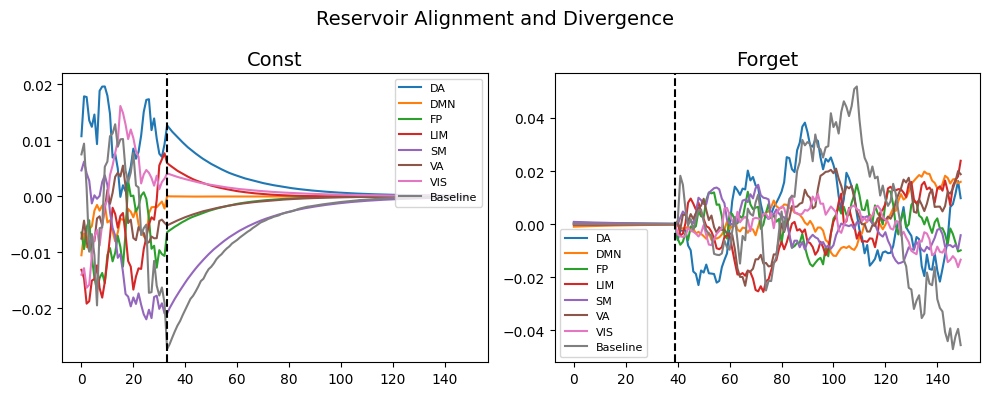

In [7]:
# now plot the moving window averages
fig= plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for i, network in enumerate(constAvgs.keys()):
    plt.plot(constAvgs[network], label=network)
plt.title("Const", fontsize=fs)
plt.axvline(x=33,color='k', linestyle='--')
plt.legend(loc='upper right', fontsize=8)

plt.subplot(1,2,2)
for i, network in enumerate(forgetAvgs.keys()):
    plt.plot(forgetAvgs[network], label=network)
plt.axvline(x=39,color='k', linestyle='--')
plt.title("Forget", fontsize=fs)
plt.legend(loc='lower left', fontsize=8)

plt.suptitle("Reservoir Alignment and Divergence", fontsize=fs)
plt.tight_layout()

In [ ]:
# now do this across seeds

# Notes

A couple of things I notice from this experiment
1. The time constants of construction are about the same across the board for the networks. It could be worth quantifying just how different the connectivity matrices are between the networks?
3. Forgetting is near instant for all of the networks, which makes sense.

### What to try next:

- Look into the distribution of time constants across neurons for each network
    